In [3]:
# library import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#settings regarding plot size

plt.rcParams["figure.figsize"]= [15,8]
%config InLineBackend.figure_format = 'retina'

# make notebook display each output individually
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [72]:
data = pd.read_csv('/Users/kmd8594/Desktop/Principles of Data Mining/dataMining/response_times_sample.csv')

/var/folders/3r/qmnrfqg13zb9fs4ww29z88vh0000gn/T/ipykernel_25358/1425782477.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/kmd8594/Desktop/Principles of Data Mining/dataMining/response_times_sample.csv')


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tweet_id                 499988 non-null  object 
 1   author_id                499988 non-null  object 
 2   in_response_to_tweet_id  471981 non-null  float64
 3   response_tweet_id        471981 non-null  object 
 4   text                     499928 non-null  object 
 5   created_at               499928 non-null  object 
 6   response_time            500000 non-null  float64
dtypes: float64(2), object(5)
memory usage: 26.7+ MB


<AxesSubplot:>

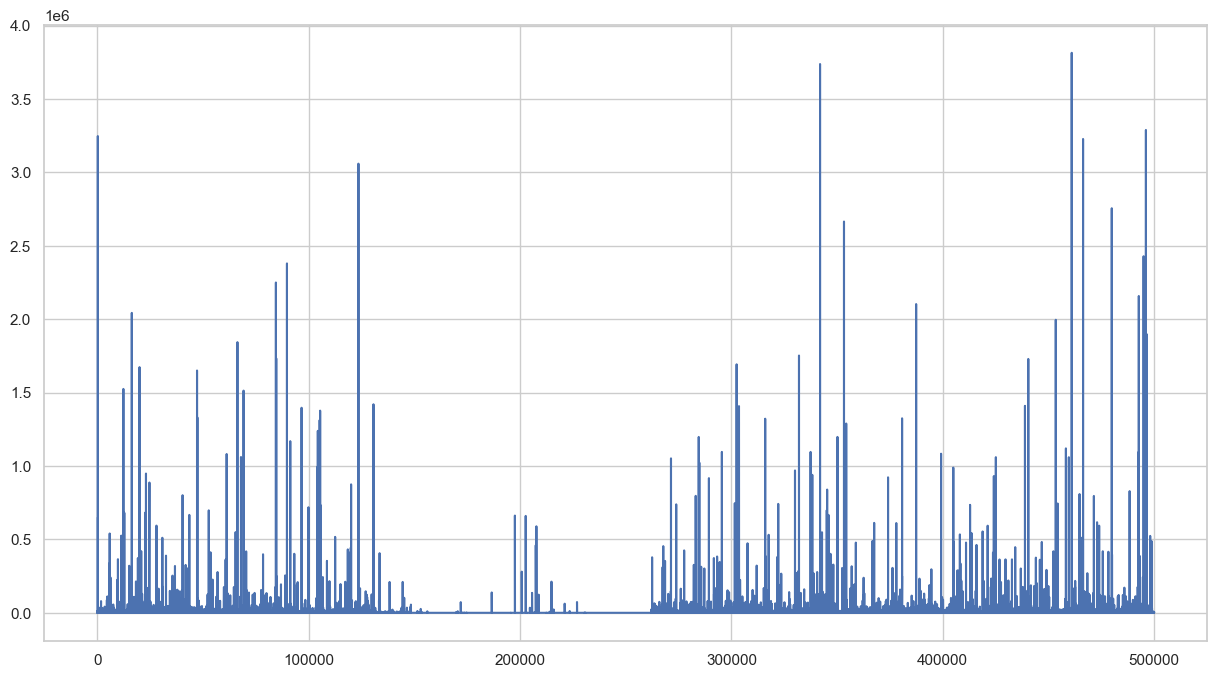

In [75]:
data['response_time'].plot()

In [76]:
data.drop(data[data["author_id"] == '180702'].index, inplace=True)

In [78]:
data.drop(data[data["response_time"] == -1].index, inplace=True)

<AxesSubplot:>

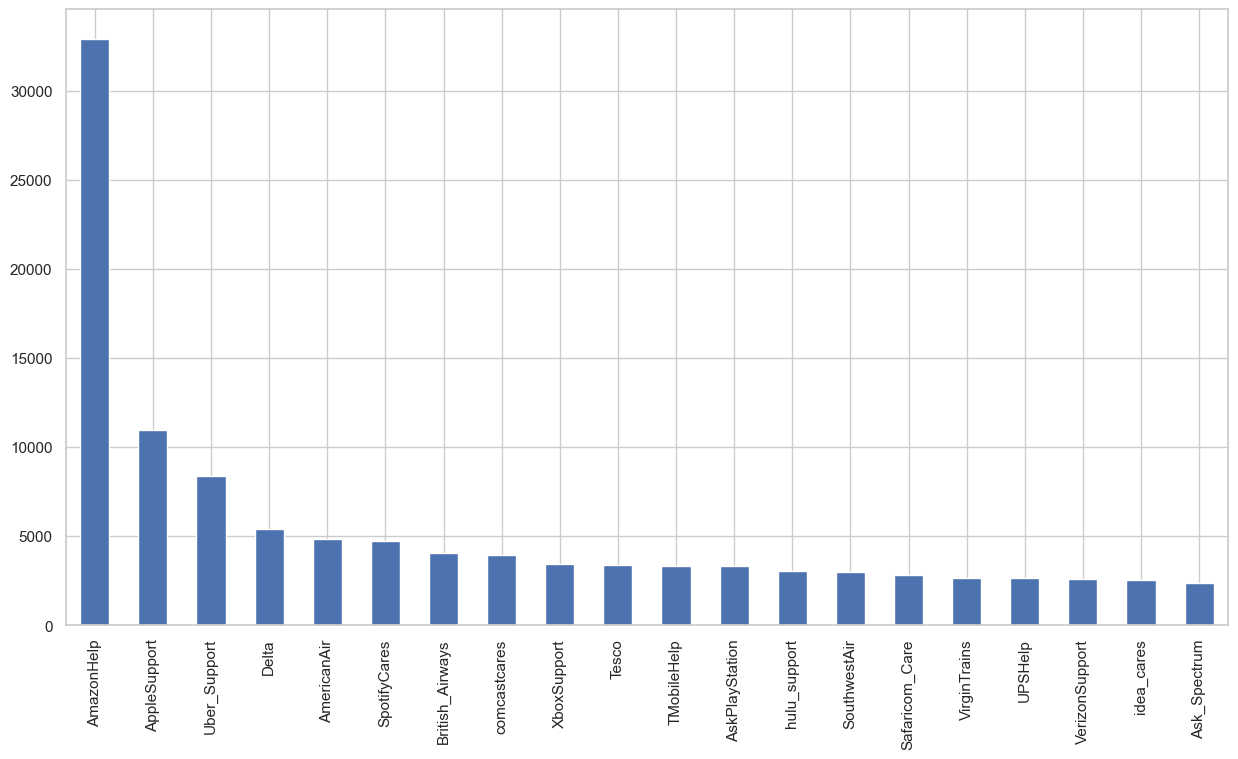

In [80]:
data['author_id'].value_counts()[:20].plot(kind='bar')

In [115]:
top20 = data.loc[(data['author_id'] == 'AmazonHelp') | 
                 (data['author_id'] == 'AppleSupport') | 
                 (data['author_id'] == 'Uber_Support') | 
                 (data['author_id'] == 'Delta') | 
                 (data['author_id'] == 'AmericanAir') | 
                 (data['author_id'] == 'SpotifyCares') | 
                 (data['author_id'] == 'British_Airways') | 
                 (data['author_id'] == 'comcastcares') |
                 (data['author_id'] == 'XboxSupport') |
                 (data['author_id'] == 'TMobileHelp') |
                 (data['author_id'] == 'AskPlayStation') |
                 (data['author_id'] == 'hulu_support') |
                 (data['author_id'] == 'SouthwestAir') |
                 (data['author_id'] == 'Tesco') |
                 (data['author_id'] == 'Safaricom_Care') |
                 (data['author_id'] == 'VerizonSupport') |
                 (data['author_id'] == 'VirginTrains') |
                 (data['author_id'] == 'idea_cares') |
                 (data['author_id'] == 'Ask_Spectrum') |
                 (data['author_id'] == 'UPSHelp')]

In [116]:
playstation = data.loc[(data['author_id'] == 'AskPlayStation')]
spotify = data.loc[(data['author_id'] == 'SpotifyCares')]

In [117]:
playstation.describe()
spotify.describe()

,in_response_to_tweet_id,response_time
count,3328.000000,3328.000000
mean,311915.866286,396.803435
std,142477.002436,606.505928
min,180.000000,1.083333
25%,277914.500000,3.833333
50%,346640.000000,20.308333
75%,406755.250000,616.487500
max,527935.000000,5551.850000


,in_response_to_tweet_id,response_time
count,4740.000000,4.740000e+03
mean,282481.752743,4.403757e+02
std,169168.819825,2.199961e+04
min,849.000000,7.666667e-01
25%,110047.500000,1.173333e+01
50%,321498.000000,4.222500e+01
75%,430239.750000,1.104167e+02
max,534630.000000,1.513351e+06


Text(0.5, 1.0, 'Average Company Response Times')

Text(0.5, 0, 'Companies')

Text(0, 0.5, 'Average Response Time (in minutes)')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Ask_Spectrum'),
  Text(1, 0, 'VerizonSupport'),
  Text(2, 0, 'AskPlayStation'),
  Text(3, 0, 'AmazonHelp'),
  Text(4, 0, 'XboxSupport'),
  Text(5, 0, 'UPSHelp'),
  Text(6, 0, 'Delta'),
  Text(7, 0, 'AppleSupport'),
  Text(8, 0, 'Uber_Support'),
  Text(9, 0, 'Tesco'),
  Text(10, 0, 'SpotifyCares'),
  Text(11, 0, 'British_Airways'),
  Text(12, 0, 'comcastcares'),
  Text(13, 0, 'AmericanAir'),
  Text(14, 0, 'TMobileHelp'),
  Text(15, 0, 'VirginTrains'),
  Text(16, 0, 'SouthwestAir'),
  Text(17, 0, 'hulu_support'),
  Text(18, 0, 'idea_cares'),
  Text(19, 0, 'Safaricom_Care')])

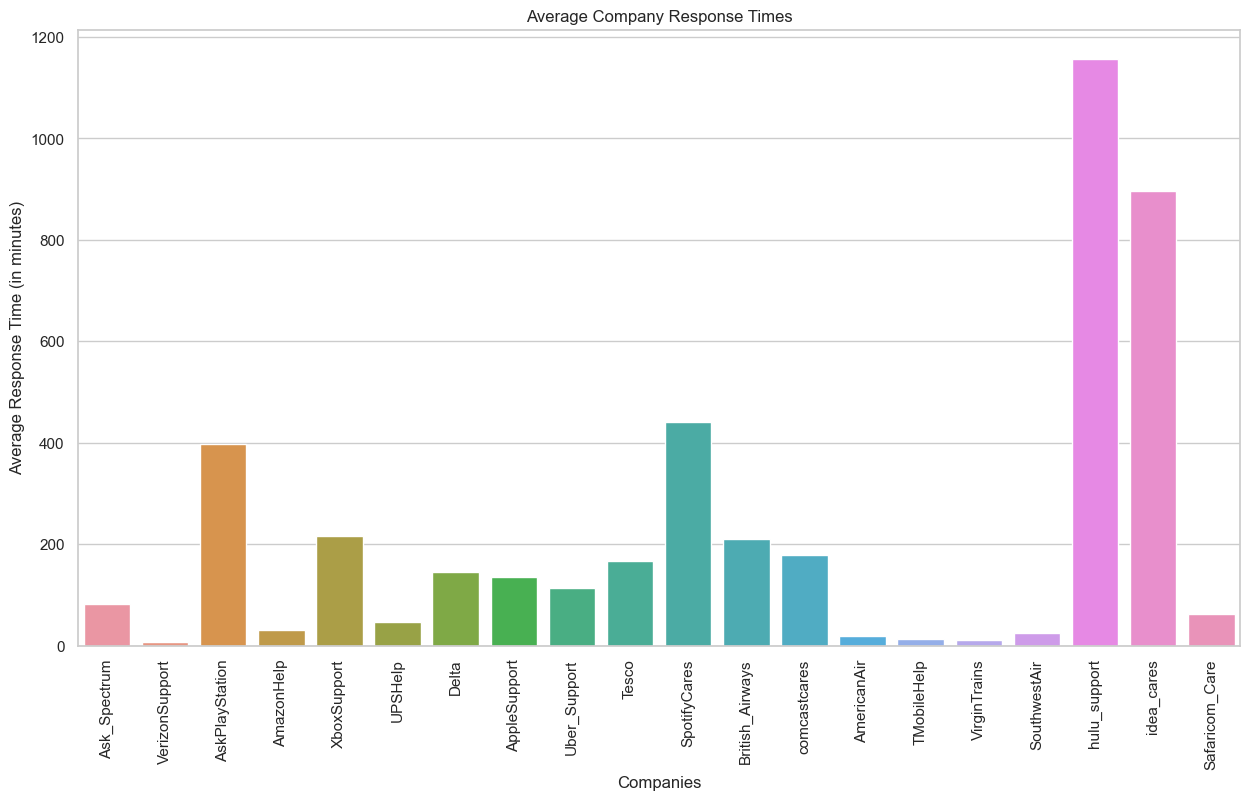

In [140]:
# Graph 1: Scatter plot: top 20 Companies vs response times

sns.set(style="whitegrid")
ax = sns.barplot(data=top20, x="author_id", y="response_time", ci=None)
plt.title('Average Company Response Times')
plt.xlabel('Companies')
plt.ylabel('Average Response Time (in minutes)')
plt.xticks(rotation=90)
#plt.show()
plt.savefig('average.png', bbox_inches='tight')

Text(0.5, 1.0, 'Company Response Times')

Text(0.5, 0, 'Companies')

Text(0, 0.5, 'Response Time (in minutes)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

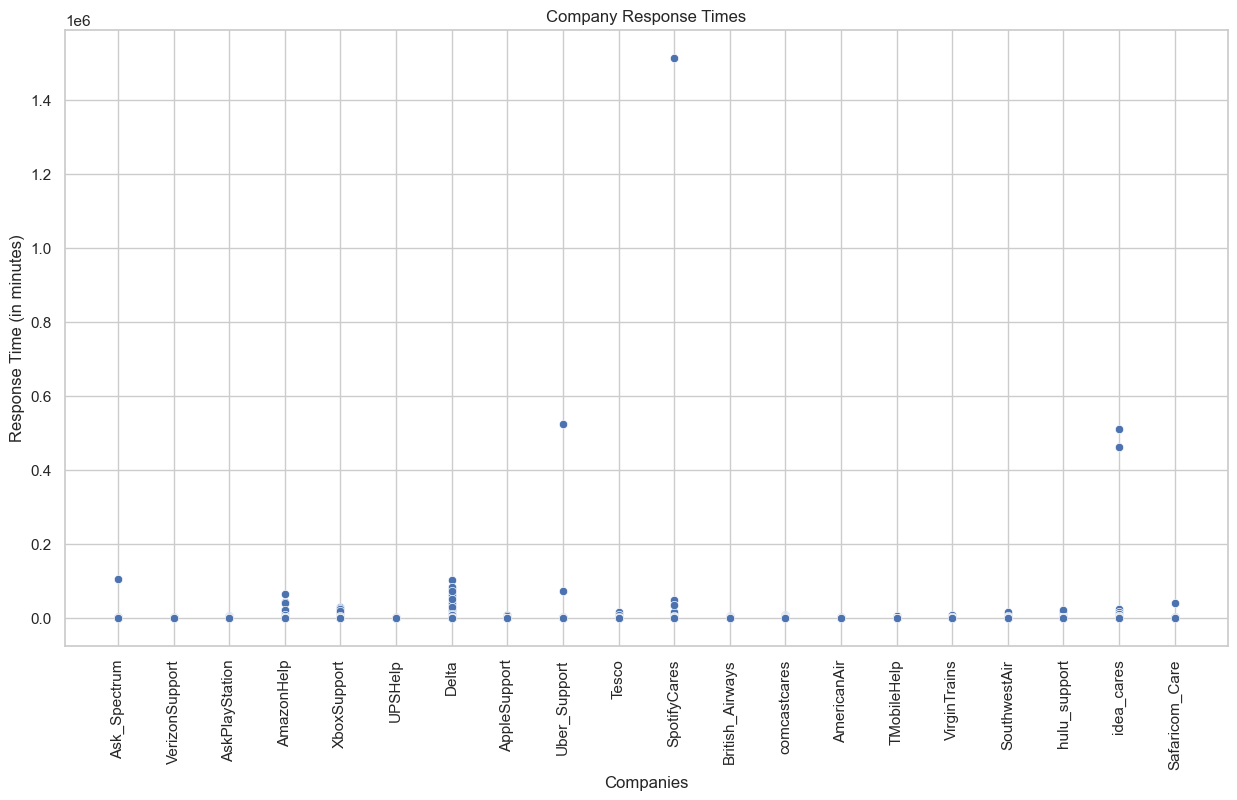

In [141]:
sns.set(style="whitegrid")
ax = sns.scatterplot(x="author_id", y="response_time", data = top20)
plt.title('Company Response Times')
plt.xlabel('Companies')
plt.ylabel('Response Time (in minutes)')
plt.xticks(rotation=90)
#plt.show()
plt.savefig('scatter.png', bbox_inches='tight')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'AmazonHelp'),
  Text(1, 0, 'AmericanAir'),
  Text(2, 0, 'AppleSupport'),
  Text(3, 0, 'AskPlayStation'),
  Text(4, 0, 'Ask_Spectrum'),
  Text(5, 0, 'British_Airways'),
  Text(6, 0, 'Delta'),
  Text(7, 0, 'Safaricom_Care'),
  Text(8, 0, 'SouthwestAir'),
  Text(9, 0, 'SpotifyCares'),
  Text(10, 0, 'TMobileHelp'),
  Text(11, 0, 'Tesco'),
  Text(12, 0, 'UPSHelp'),
  Text(13, 0, 'Uber_Support'),
  Text(14, 0, 'VerizonSupport'),
  Text(15, 0, 'VirginTrains'),
  Text(16, 0, 'XboxSupport'),
  Text(17, 0, 'comcastcares'),
  Text(18, 0, 'hulu_support'),
  Text(19, 0, 'idea_cares')])

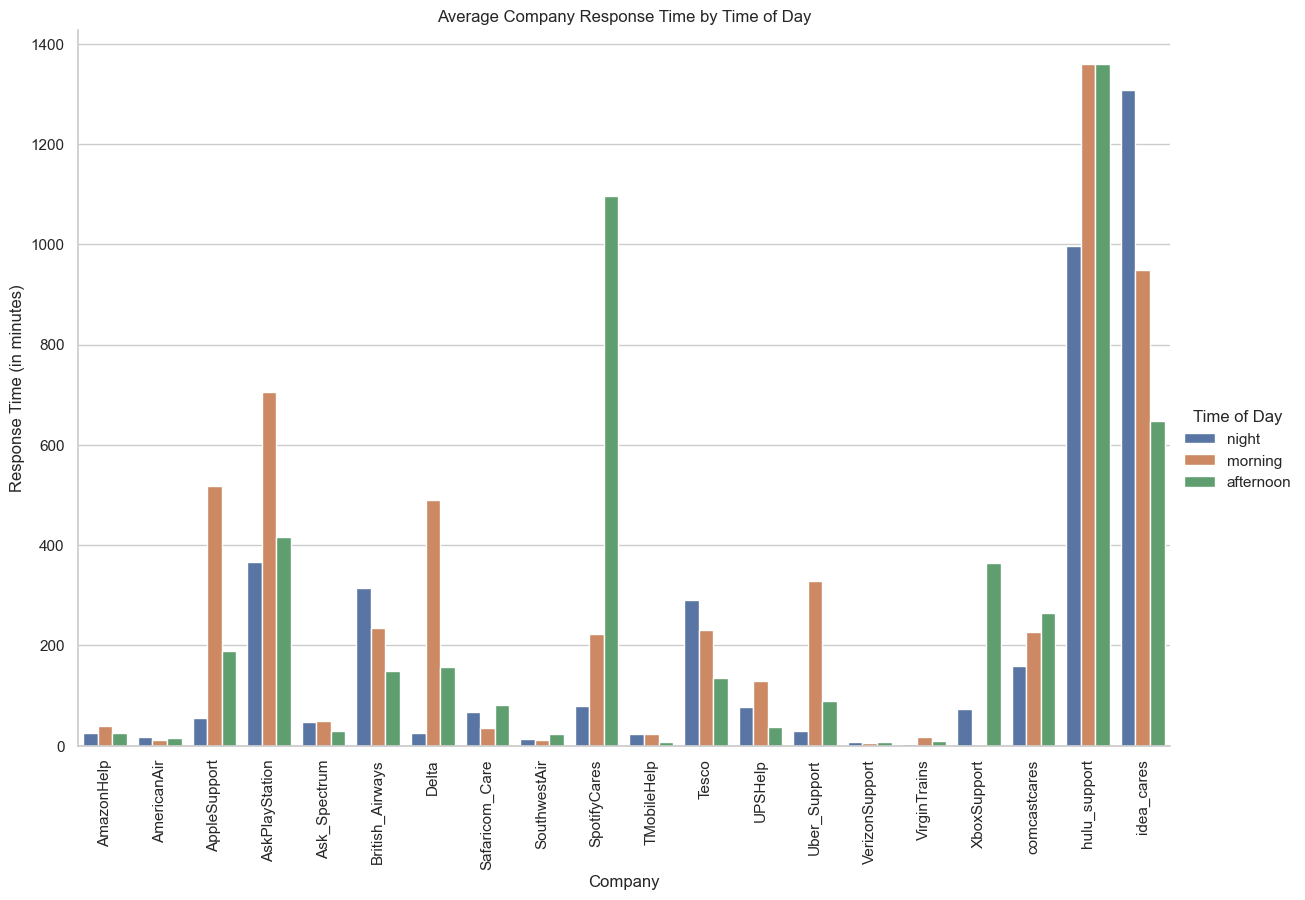

In [132]:
# Create a copy of the top20 DataFrame
top20_copy = top20.copy()

# Convert the 'created_at' column to a datetime object
top20_copy['created_at'] = pd.to_datetime(top20_copy['created_at'])

# Extract the hour of the day from the 'created_at' column
top20_copy['hour'] = top20_copy['created_at'].dt.hour

# Create a new column indicating whether the tweet was created in the morning, afternoon, or night
top20_copy['time_of_day'] = pd.cut(top20_copy['hour'], bins=[0, 6, 12, 18], labels=['night', 'morning', 'afternoon'])

# Group the DataFrame by author_id and time_of_day and calculate the average response_time for each group
grouped = top20_copy.groupby(['author_id', 'time_of_day'])['response_time'].mean().reset_index()

# Create a grouped barplot showing the average response time for each company and time of day
plot = sns.catplot(x='author_id', y='response_time', hue='time_of_day', data=grouped, kind='bar', height=8, aspect=1.5)
plt.xticks(rotation=90)
plot.set(xlabel='Company', ylabel='Response Time (in minutes)', title='Average Company Response Time by Time of Day')
plot._legend.set_title('Time of Day')
plot.savefig("time_by_time.png")